# NBA Trends
In this project, we’ll analyze data from the NBA (National Basketball Association) and explore possible associations.

This data was originally sourced from 538’s Analysis of the Complete History Of The NBA and contains the original, unmodified data from Basketball Reference as well as several additional variables 538 added to perform their own analysis.

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency,pearsonr

In [4]:
df = pd.read_csv('nba_games.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24359 entries, 0 to 24358
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        24359 non-null  object 
 1   year_id        24359 non-null  int64  
 2   fran_id        24359 non-null  object 
 3   opp_fran       24359 non-null  object 
 4   game_location  24359 non-null  object 
 5   is_playoffs    24359 non-null  int64  
 6   pts            24359 non-null  int64  
 7   opp_pts        24359 non-null  int64  
 8   game_result    24359 non-null  object 
 9   forecast       24359 non-null  float64
 10  point_diff     24359 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 2.0+ MB
None


,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [18]:
# Analyzing relationships between Quant and Categorical
# Suppose we want to compare the knicks to the nets with respect to points earned per game in NBA 2010 and 2014.
new_df_2010 = df[df.year_id == 2010]
knicks_pts = new_df_2010[new_df_2010.fran_id == 'Knicks'].pts
nets_pts = new_df_2010[new_df_2010.fran_id == 'Nets'].pts
knicks_pts_mean = np.mean(knicks_pts)
nets_pts_mean = np.mean(nets_pts)
Mean_difference =  knicks_pts_mean -  nets_pts_mean
print(f'Average Difference in Points Between knicks and Nets is {Mean_difference}')

Average Difference in Points Between knicks and Nets is 9.731707317073173


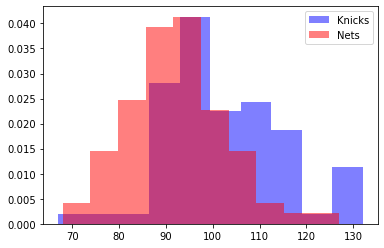

In [21]:
# Rather than comparing means, it’s useful look at the full distribution of values to understand
# whether a difference in means is meaningful.
plt.hist(knicks_pts,color='blue',alpha=0.5,density=True,label='Knicks')
plt.hist(nets_pts,color='red',alpha=0.5,density=True,label ='Nets')
plt.legend()
plt.show()

This Overlaping Histogram Suggest that their is some association Between Points of these two teams as less overlaping correspond to more assocoation.

In [22]:
# Now for NBA 2014
new_df_2014 = df[df.year_id == 2014]
knicks_pts = new_df_2014[new_df_2014.fran_id == 'Knicks'].pts
nets_pts = new_df_2014[new_df_2014.fran_id == 'Nets'].pts
knicks_pts_mean = np.mean(knicks_pts)
nets_pts_mean = np.mean(nets_pts)
Mean_difference =  knicks_pts_mean -  nets_pts_mean
print(f'Average Difference in Points Between knicks and Nets is {Mean_difference}')

Average Difference in Points Between knicks and Nets is 0.44706798131809933


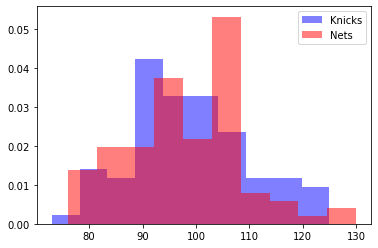

In [23]:
plt.hist(knicks_pts,color='blue',alpha=0.5,density=True,label='Knicks')
plt.hist(nets_pts,color='red',alpha=0.5,density=True,label ='Nets')
plt.legend()
plt.show()

This Overlaping Histogram Suggest that their is very low association Between Points of these two teams as more overlaping correspond to less assocoation.

<AxesSubplot:xlabel='fran_id', ylabel='pts'>

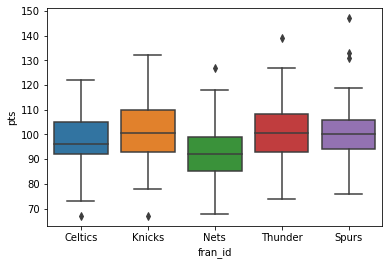

In [25]:
#  Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.
sns.boxplot(data=new_df_2010,x='fran_id',y='pts')

Here in this side-by-side box plot the boxes are overlapping suggest very low association between franchaises and points

In [31]:
# Analyzing relationships between Categorical variables

# The variable game_result indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). 
# The variable game_location indicates whether a team was playing at home, away('H' stands for “home” and 'A' stands for “away”)

contingency_table = pd.crosstab(df.game_result,df.game_location)
print(contingency_table)

# Summarizing contingency table with chi2_contingency

chi2,pval,dof,expected = chi2_contingency(contingency_table/len(df))
print(chi2)

game_location     A     H  N
game_result                 
L              7105  4298  3
W              5003  7942  8
0.0558022856011154


Teams tend to win more games at home compared to away.

Based on this output, a chi-square this small suggest that there is very little association between game result and location.


0.4644799841112692


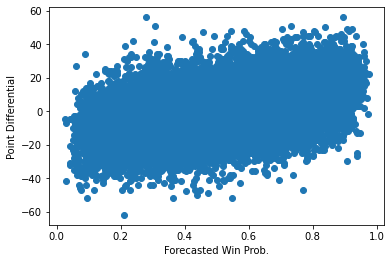

In [35]:
# Analyzing Relationships Between Quantitative Variables
# For each game, 538 has calculated the probability that each team will win the game. In the data, this is saved as forecast. 
# The point_diff column gives the margin of victory/defeat for each team .

corr_forecast_pointdiff,p = pearsonr(df.forecast,df.point_diff)
print(corr_forecast_pointdiff)
plt.scatter(df.forecast,df.point_diff)
plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()

Looking at the plot and Correlation value suggest that there is small linear association between forecast and point Diffference.